In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

HSC PDR3 catalog from this query:
````{verbatim}
SELECT
    ra, dec, a_g, a_r, a_i, a_z, a_y
FROM
    pdr3_wide.forced
WHERE
    isprimary AND r_cmodel_mag<16.0
LIMIT 10000;
````

In [4]:
cat = Table(fitsio.read('/Users/rongpu/Downloads/hsc.fits'))

In [5]:
sys.path.append(os.path.expanduser('~/git/Python/useful/'))

from get_ebv_from_map import get_ebv_from_map
ebv = get_ebv_from_map([np.array(cat['ra']), np.array(cat['dec'])], mapdir='/Users/rongpu/Documents/Data/useful/sfddata')

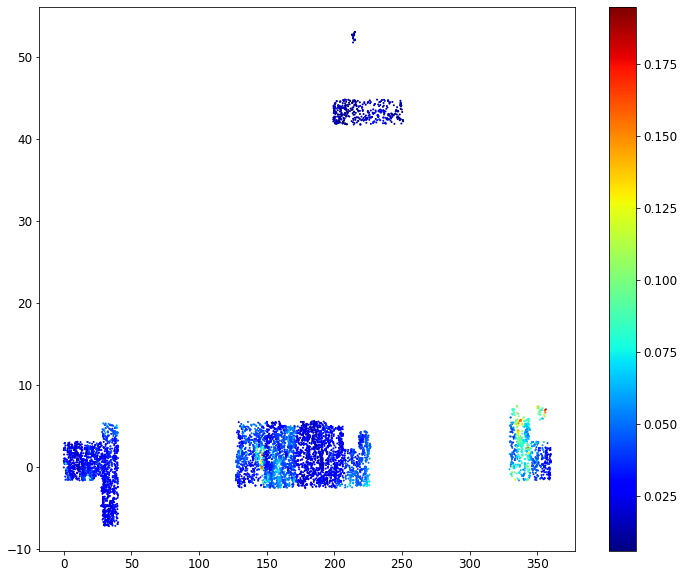

In [6]:
plt.figure(figsize=(12, 10))
plt.scatter(cat['ra'], cat['dec'], c=ebv, s=1, cmap='jet')
plt.colorbar()
plt.show()

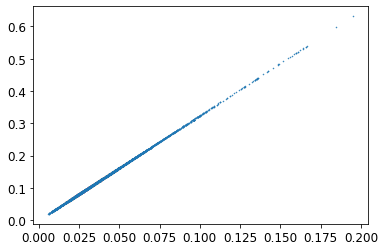

In [24]:
plt.plot(ebv, cat['a_g'], '.', ms=1)
plt.show()

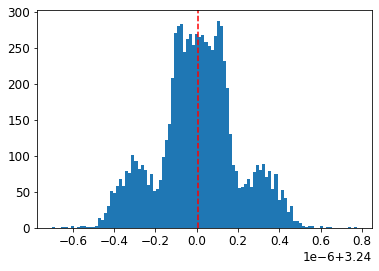

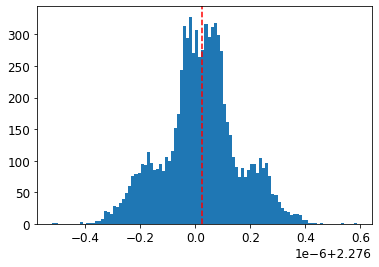

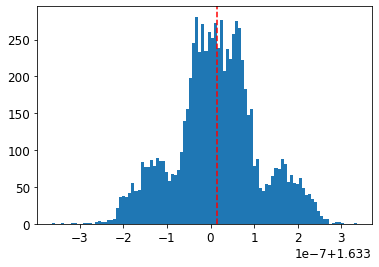

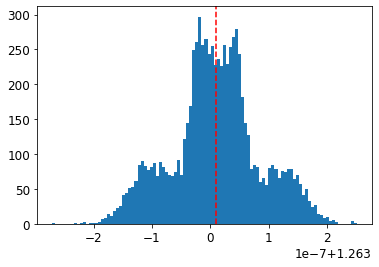

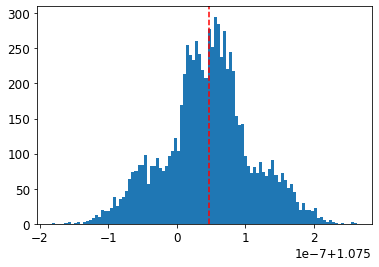

In [16]:
coeffs = {}
for band in ['g', 'r', 'i', 'z', 'y']:
    coeffs[band] = np.median(cat['a_'+band]/ebv)
    plt.hist(cat['a_'+band]/ebv, 100)
    plt.axvline(coeffs[band], color='r', ls='--')
    plt.show()

In [23]:
for band in ['g', 'r', 'i', 'z', 'y']:
    print(band, '{:g}'.format(coeffs[band]))

g 3.24
r 2.276
i 1.633
z 1.263
y 1.075
